# Modelos de regresión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./datasets/synth_temp.csv")
df.head()

,AverageTemperature,Year
0,12.980258,1841
1,13.689697,1842
2,12.485703,1843
3,14.202069,1844
4,12.831530,1845


In [4]:
df = df.loc[df.Year > 1901]
df.head()

,AverageTemperature,Year
366,16.973653,1902
367,17.181773,1903
368,17.436933,1904
369,17.688948,1905
370,17.811166,1906


In [5]:
df_group_year = df.groupby('Year').agg(np.mean)
df_group_year.head()

,AverageTemperature
Year,
1902,17.438122
1903,17.375456
1904,17.558674
1905,17.740646
1906,17.501770


In [6]:
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean()
rolling.head(n=20)

Year
1902          NaN
1903          NaN
1904          NaN
1905          NaN
1906          NaN
1907          NaN
1908          NaN
1909          NaN
1910          NaN
1911    17.501145
1912    17.502700
1913    17.500737
1914    17.487112
1915    17.466333
1916    17.460069
1917    17.475434
1918    17.463959
1919    17.472423
1920    17.474037
1921    17.480317
Name: AverageTemperature, dtype: float64

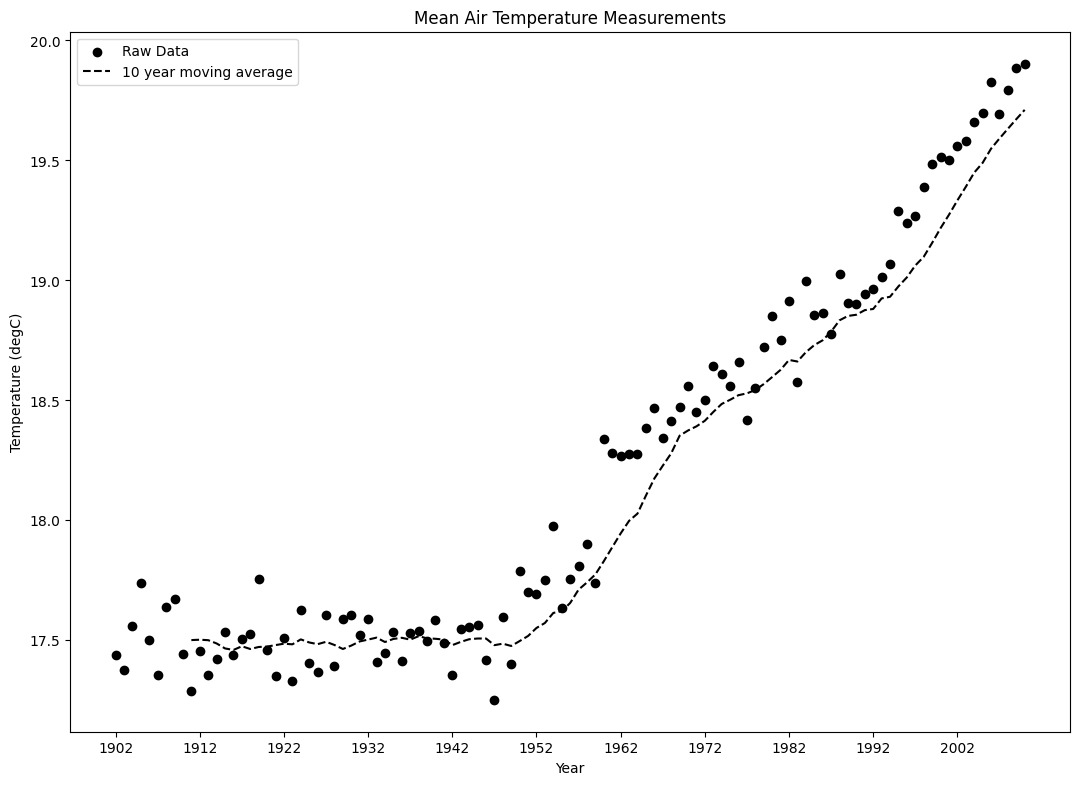

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--',
label=f'{window} year moving average');
ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(),
10))
ax.legend();

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_group_year.index.values.reshape((-1, 1)), df_group_year.AverageTemperature)

LinearRegression()

In [13]:
print(f'm = {model.coef_[0]}')
print(f'c = {model.intercept_}')
print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x + {model.intercept_:0.4f}')

m = 0.02314646083800687
c = -27.08038666079998

Model Definition
y = 0.02315x + -27.0804


In [14]:
trend_x = np.array([
df_group_year.index.values.min(),
df_group_year.index.values.mean(),
df_group_year.index.values.max()
])
trend_y = model.predict(trend_x.reshape((-1, 1)))
trend_y

array([16.94418185, 18.19409074, 19.44399962])

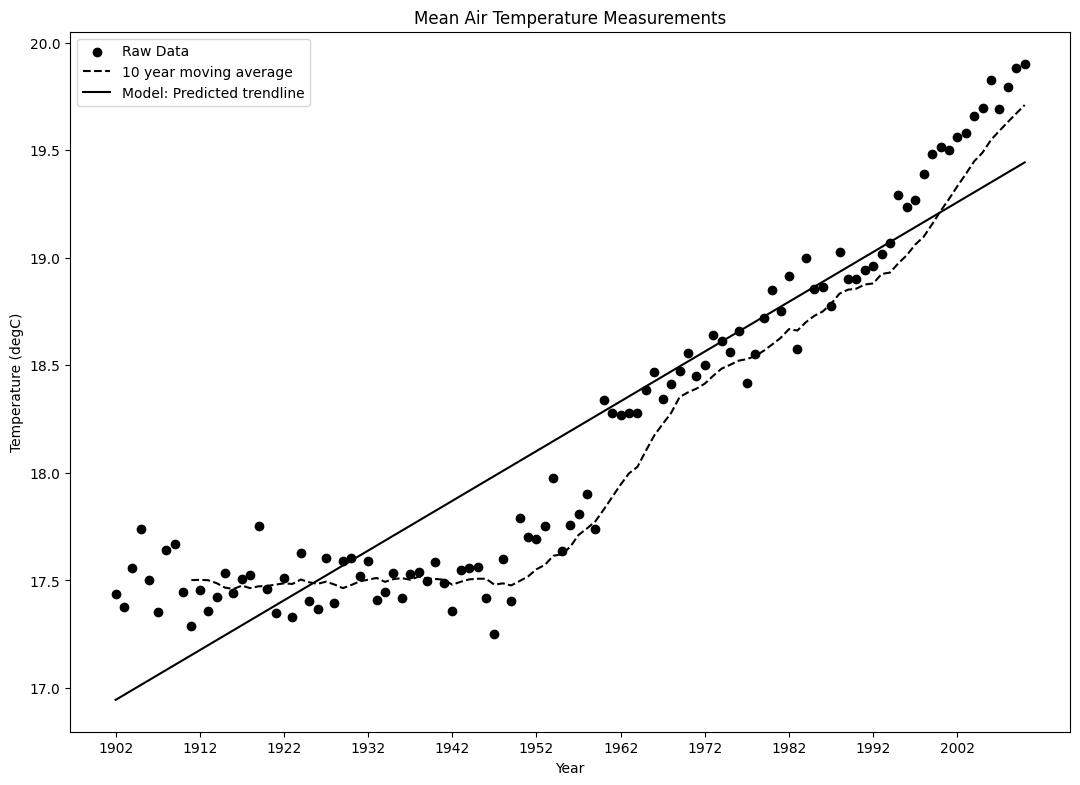

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature,
label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--',
label=f'{window} year moving average');
ax.plot(trend_x, trend_y, c='k', label='Model: Predicted trendline')
ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(),
10))
ax.legend();

## Classification

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

In [17]:
df = pd.read_csv("./datasets/iris-data.csv")
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


/tmp/ipykernel_8826/3344173512.py:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group['Sepal Length'],


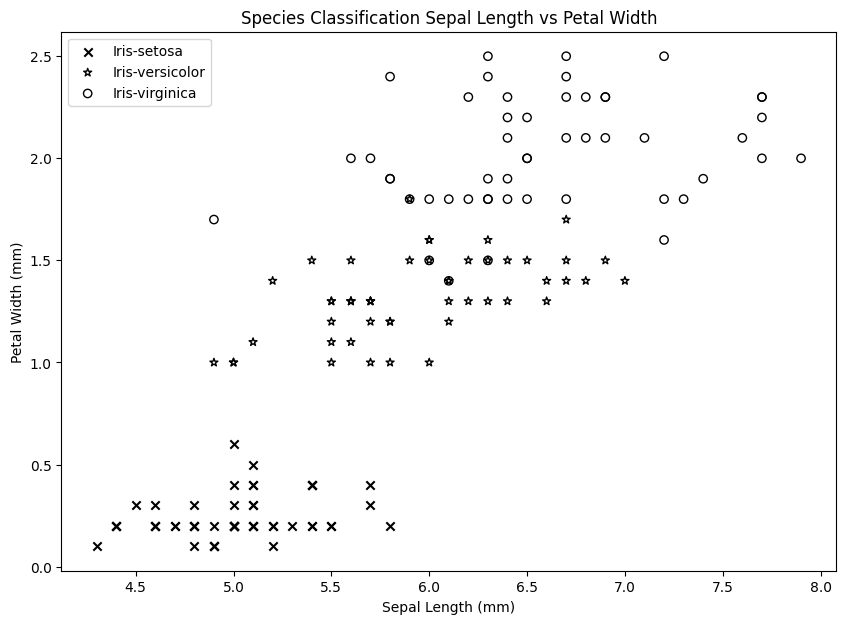

In [18]:
markers = {
    'Iris-setosa': {'marker': 'x', 'facecolor': 'k', 'edgecolor': 'k'},
    'Iris-versicolor': {'marker': '*', 'facecolor': 'none', 'edgecolor':'k'},
    'Iris-virginica': {'marker': 'o', 'facecolor': 'none', 'edgecolor':'k'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Length'], 
                group['Petal Width'],
                label=name,
                marker=markers[name]['marker'],
                facecolors=markers[name]['facecolor'],
                edgecolor=markers[name]['edgecolor'])

plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();

In [19]:
df_test = df.iloc[134]
df = df.drop([134]) # Remove the sample
df_test

Sepal Length               6.1
Sepal Width                2.6
Petal Length               5.6
Petal Width                1.4
Species         Iris-virginica
Name: 134, dtype: object

/tmp/ipykernel_8826/3766702558.py:3: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(group['Sepal Length'], group['Petal Width'],


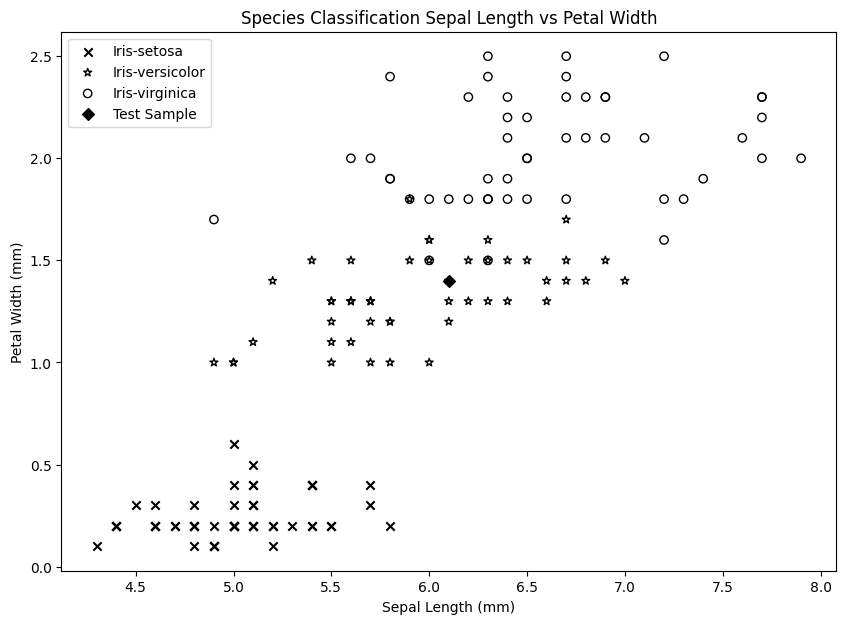

In [20]:
plt.figure(figsize=(10, 7))
for name, group in df.groupby('Species'):
    plt.scatter(group['Sepal Length'], group['Petal Width'],
    label=name,
    marker=markers[name]['marker'],
    facecolors=markers[name]['facecolor'],
    edgecolor=markers[name]['edgecolor'])
plt.scatter(df_test['Sepal Length'], df_test['Petal Width'], label='Test Sample', c='k', marker='D')
plt.title('Species Classification Sepal Length vs Petal Width');
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Petal Width (mm)');
plt.legend();

In [24]:
model = KNN(n_neighbors=3)
model.fit(X=df[['Petal Width', 'Sepal Length']], y=df.Species)
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Check the performance of the model against the training set:

In [25]:
model.score(X=df[['Petal Width', 'Sepal Length']], y=df.Species)

0.9731543624161074

In [26]:
model.predict(df_test[['Petal Width', 'Sepal Length']].values.reshape((-1,2)))[0]

/home/angel/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Iris-versicolor'

In [27]:
df.iloc[134].Species

'Iris-virginica'

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [30]:
df = pd.read_csv("./datasets/iris-data.csv")
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
np.random.seed(10)
samples = np.random.randint(0, len(df), 10)
df_test = df.iloc[samples]
df = df.drop(samples)

In [33]:
model = DecisionTreeClassifier()
model = model.fit(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)
print(model.get_params())
model.score(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


1.0